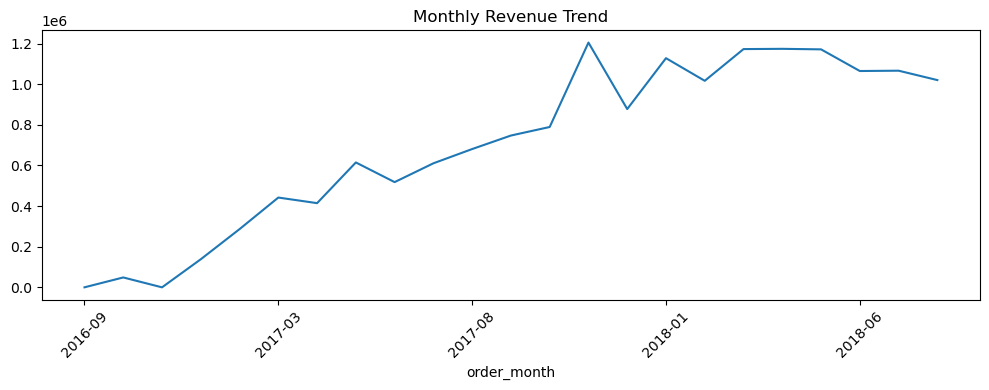

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/clean_olist_data.csv")

monthly = df.groupby("order_month")["revenue"].sum()

monthly.plot(figsize=(10,4), title="Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
